# Example of BAO significance calculations for AGN and Clusters

Import the necessary packages

In [7]:
import sys
sys.path.append('../../../')


from scripts.forecast import DataGenerator, make_photoz_bin_edges, plot_cl_datagen
from scripts.luminosity_functions import def_agn_xlf, def_clusters_xlf
import matplotlib
from scripts.utils import np, plt, set_mpl
set_mpl()
%matplotlib inline


#cosmological parameters for BAO (Eisenstein & Hu, 1997)
fiducial_params_EH = {'Omega_c': 0.25, 'Omega_b': 0.05,
                      'h': 0.7, 'sigma8': 0.8, 'n_s': 0.96,
                      'transfer_function': 'eisenstein_hu',
                      'baryons_power_spectrum': 'nobaryons',
                      'matter_power_spectrum': 'linear'}

#cosmological parameters witohut  BAO (Eisenstein & Hu, 1997, No Wiggles)
fiducial_params_EH_NW = {'Omega_c': 0.25, 'Omega_b': 0.05,
                         'h': 0.7, 'sigma8': 0.8, 'n_s': 0.96,
                         'transfer_function': 'eisenstein_hu_nowiggles',
                         'baryons_power_spectrum': 'nobaryons',
                         'matter_power_spectrum': 'linear'}



set palette to pastel
set matplotlib rc


Define function to calculate BAO significance S/N:

$$ S/N = \sqrt{ (\mathbf{C}_{\ell}^{BAO} - \mathbf{C}_{\ell}^{no~ BAO})^T  \mathrm{Cov}_{\ell}^{-1}  (\mathbf{C}_{\ell}^{BAO} - \mathbf{C}_{\ell}^{no~ BAO})} $$

In [8]:

def calc_BAO_sign(datagen_BAO: DataGenerator, datagen_NO_BAO: DataGenerator):
    """ calculates the SNR of BAO detection by comparing Cell of two DataGenerators"""
    assert datagen_BAO.n_bins == datagen_NO_BAO.n_bins

    data_wiggle = datagen_BAO.cls_rebin_lkl
    data_no_wiggle = datagen_NO_BAO.cls_rebin_lkl
    icov = datagen_BAO.invert_cov()
    diff = data_wiggle - data_no_wiggle
    bao_snr = np.sqrt(np.einsum('i, ji, j ->', diff, icov, diff))

    return bao_snr


## BAO in AGN 

Set the properties of the AGN survey

In [9]:
zmin_agn = 0.5
zmax_agn = 2.5
sigma0_agn = 0.03
f_fail_agn = 0.01
bins_agn = make_photoz_bin_edges(zmin_agn, zmax_agn, k=1, sigma_0=sigma0_agn)

fsky = 0.658

powspec_pars_dict_AGN = {
    'bin_left_edges': bins_agn,
    'sigma_0': sigma0_agn,
    'f_fail': f_fail_agn,
    'slim': 1e-14,
    'l_min': 10,
    'l_max': 500,
    'log_bins': 41,
    'fsky': fsky,
    'has_rsd': True,
    'use_weighed_bias': False,
    'density_multiplier': 1.3,
    'camb_llimber': 110,
    'xlf': def_agn_xlf,
    'use_camb': False,
    'delta_i': 3,
    'remove_ignored_cells': True,
}


Create DataGenerator objects for both the BAO and no BAO AGN simulations

In [10]:
datagen_AGN_BAO = DataGenerator(RUN_NAME='Fisher_matrices_experiments',
                                 fiducial_params=fiducial_params_EH, set_name = 'AGN BAO')

datagen_AGN_BAO.invoke(**powspec_pars_dict_AGN, plot_dndz=False, plot_cell=False);


Total AGN sources: 1965719 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.03, self.f_fail=0.01


calc Covariance: 100%|██████████| 435/435 [00:01<00:00, 265.58it/s]


In [11]:
datagen_AGN_NO_BAO = DataGenerator(RUN_NAME='Fisher_matrices_experiments',
                                 fiducial_params=fiducial_params_EH_NW, set_name = 'AGN NO BAO')

datagen_AGN_NO_BAO.invoke(**powspec_pars_dict_AGN, plot_dndz=False, plot_cell=False);


Total AGN sources: 1965719 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.03, self.f_fail=0.01


calc Covariance: 100%|██████████| 435/435 [00:01<00:00, 252.45it/s]


## BAO in clusters

Set the properties of the Cluster survey

In [13]:


zmin_clu = 0.1
zmax_clu = 0.8
sigma0_clu = 0.01
f_fail_clu = 0.01
bins_clu = make_photoz_bin_edges(zmin_clu, zmax_clu, k=1, sigma_0=sigma0_clu)



fsky = 0.658

powspec_pars_dict_clusters = {
    'bin_left_edges': bins_clu,
    'sigma_0': sigma0_clu,
    'f_fail': f_fail_clu,
    'slim': 4.4e-14,
    'l_min': 10,
    'l_max': 150,
    'log_bins': 31,
    'fsky':  fsky,
    'has_rsd': True,
    'use_weighed_bias': False,
    'density_multiplier': 1,
    'camb_llimber': 110,
    'xlf': def_clusters_xlf,
    'use_camb': False,
    'delta_i': 3, #use 3!!!!
}


Create DataGenerator objects for both the BAO and no BAO clusters simulations

In [14]:
datagen_clusters_BAO = DataGenerator(RUN_NAME='Fisher_matrices_experiments',
                                 fiducial_params=fiducial_params_EH, set_name = 'Clusters BAO')

datagen_clusters_BAO.invoke(**powspec_pars_dict_clusters, plot_dndz=False, plot_cell=False);
#5 min for calculating cov sigma0 = 0.005 clusters 


Total Clusters sources: 87779 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.01, self.f_fail=0.01


calc Covariance: 100%|██████████| 1275/1275 [00:15<00:00, 84.70it/s] 


In [15]:
datagen_clusters_NO_BAO = DataGenerator(RUN_NAME='Fisher_matrices_experiments',
                                 fiducial_params=fiducial_params_EH_NW, set_name = 'Clusters NO BAO')

datagen_clusters_NO_BAO.invoke(**powspec_pars_dict_clusters, plot_dndz=False, plot_cell=False);


Total Clusters sources: 87779 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.01, self.f_fail=0.01


calc Covariance: 100%|██████████| 1275/1275 [00:14<00:00, 86.00it/s] 


## Resuts and plots

Print the BAO significance S/N in sigmas for both surveys

In [16]:
cl_agn = calc_BAO_sign(datagen_AGN_BAO, datagen_AGN_NO_BAO)
print(f" BAO signal for AGN: {cl_agn} sigma")
cl_clu = calc_BAO_sign(datagen_clusters_BAO, datagen_clusters_NO_BAO)
print(f" BAO signal for clusters: {cl_clu} sigma") 

 BAO signal for AGN: 6.126555820018136 sigma
 BAO signal for clusters: 3.17523060139819 sigma


Plot Cell and Cell_No_BAO for AGN and Clusters

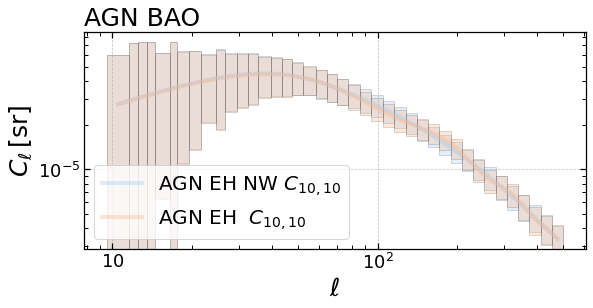

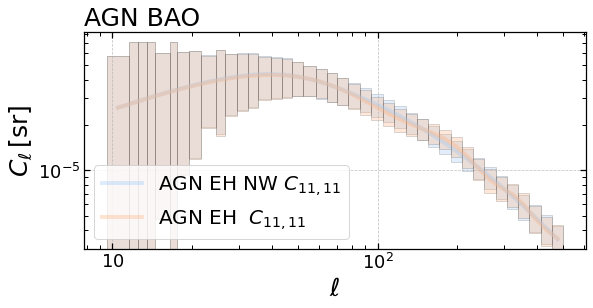

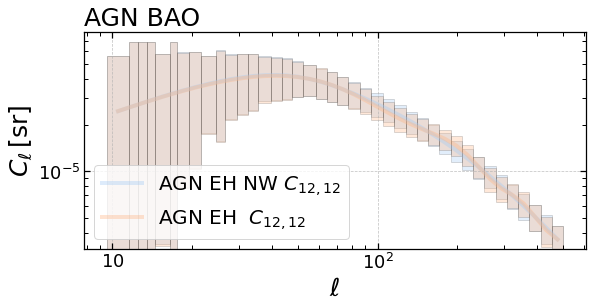

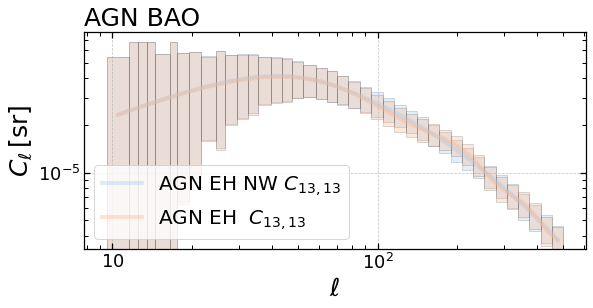

In [17]:
for i in range(10,14):
    fig,  ax =  plt.subplots( figsize = (9,4))
    j = i
    plot_cl_datagen(datagen_AGN_NO_BAO, i,j, ax = ax, label = 'AGN EH NW', alpha=0.3)
    plot_cl_datagen(datagen_AGN_BAO, i,j, ax = ax, label = 'AGN EH ', alpha=0.3)

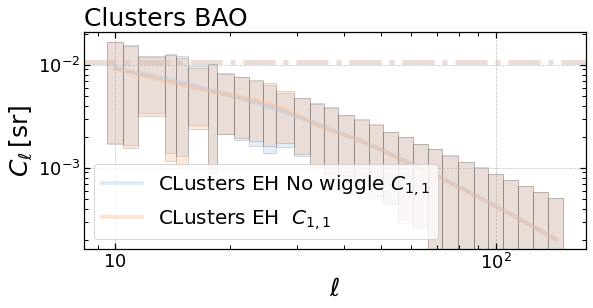

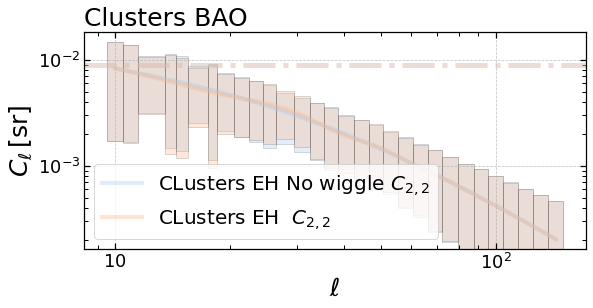

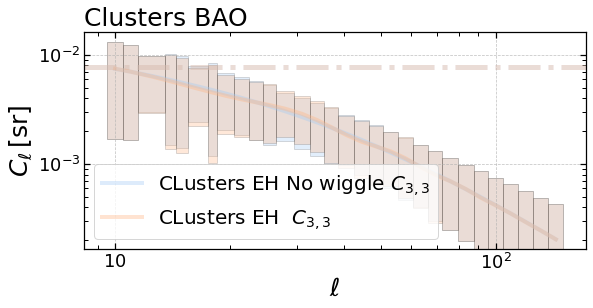

In [18]:
for i in range(1,4):
    fig,  ax =  plt.subplots( figsize = (9,4))
    j = i
    plot_cl_datagen(datagen_clusters_NO_BAO, i,j, ax = ax, label = 'CLusters EH No wiggle', alpha=0.3)
    plot_cl_datagen(datagen_clusters_BAO, i,j, ax = ax, label = 'CLusters EH ', alpha=0.3)